# Makam Parsing with Music21

### Import Modules

In [1]:
from TMMFix.parse_makam_xml import fix_m21_parsing_makam
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

### Check parsing output for one file

In [2]:
FILE_NAME = "hicaz--sarki--aksaksemai--sezdim_dargin--rifat_ayaydin.xml"
m21_stream_score = fix_m21_parsing_makam(FILE_NAME, remove_alter=True)

The key signature of this score has:
- B slash-flat
- F sharp
- C sharp
Accidentals found and updated: {'sharp', 'slash-flat'}


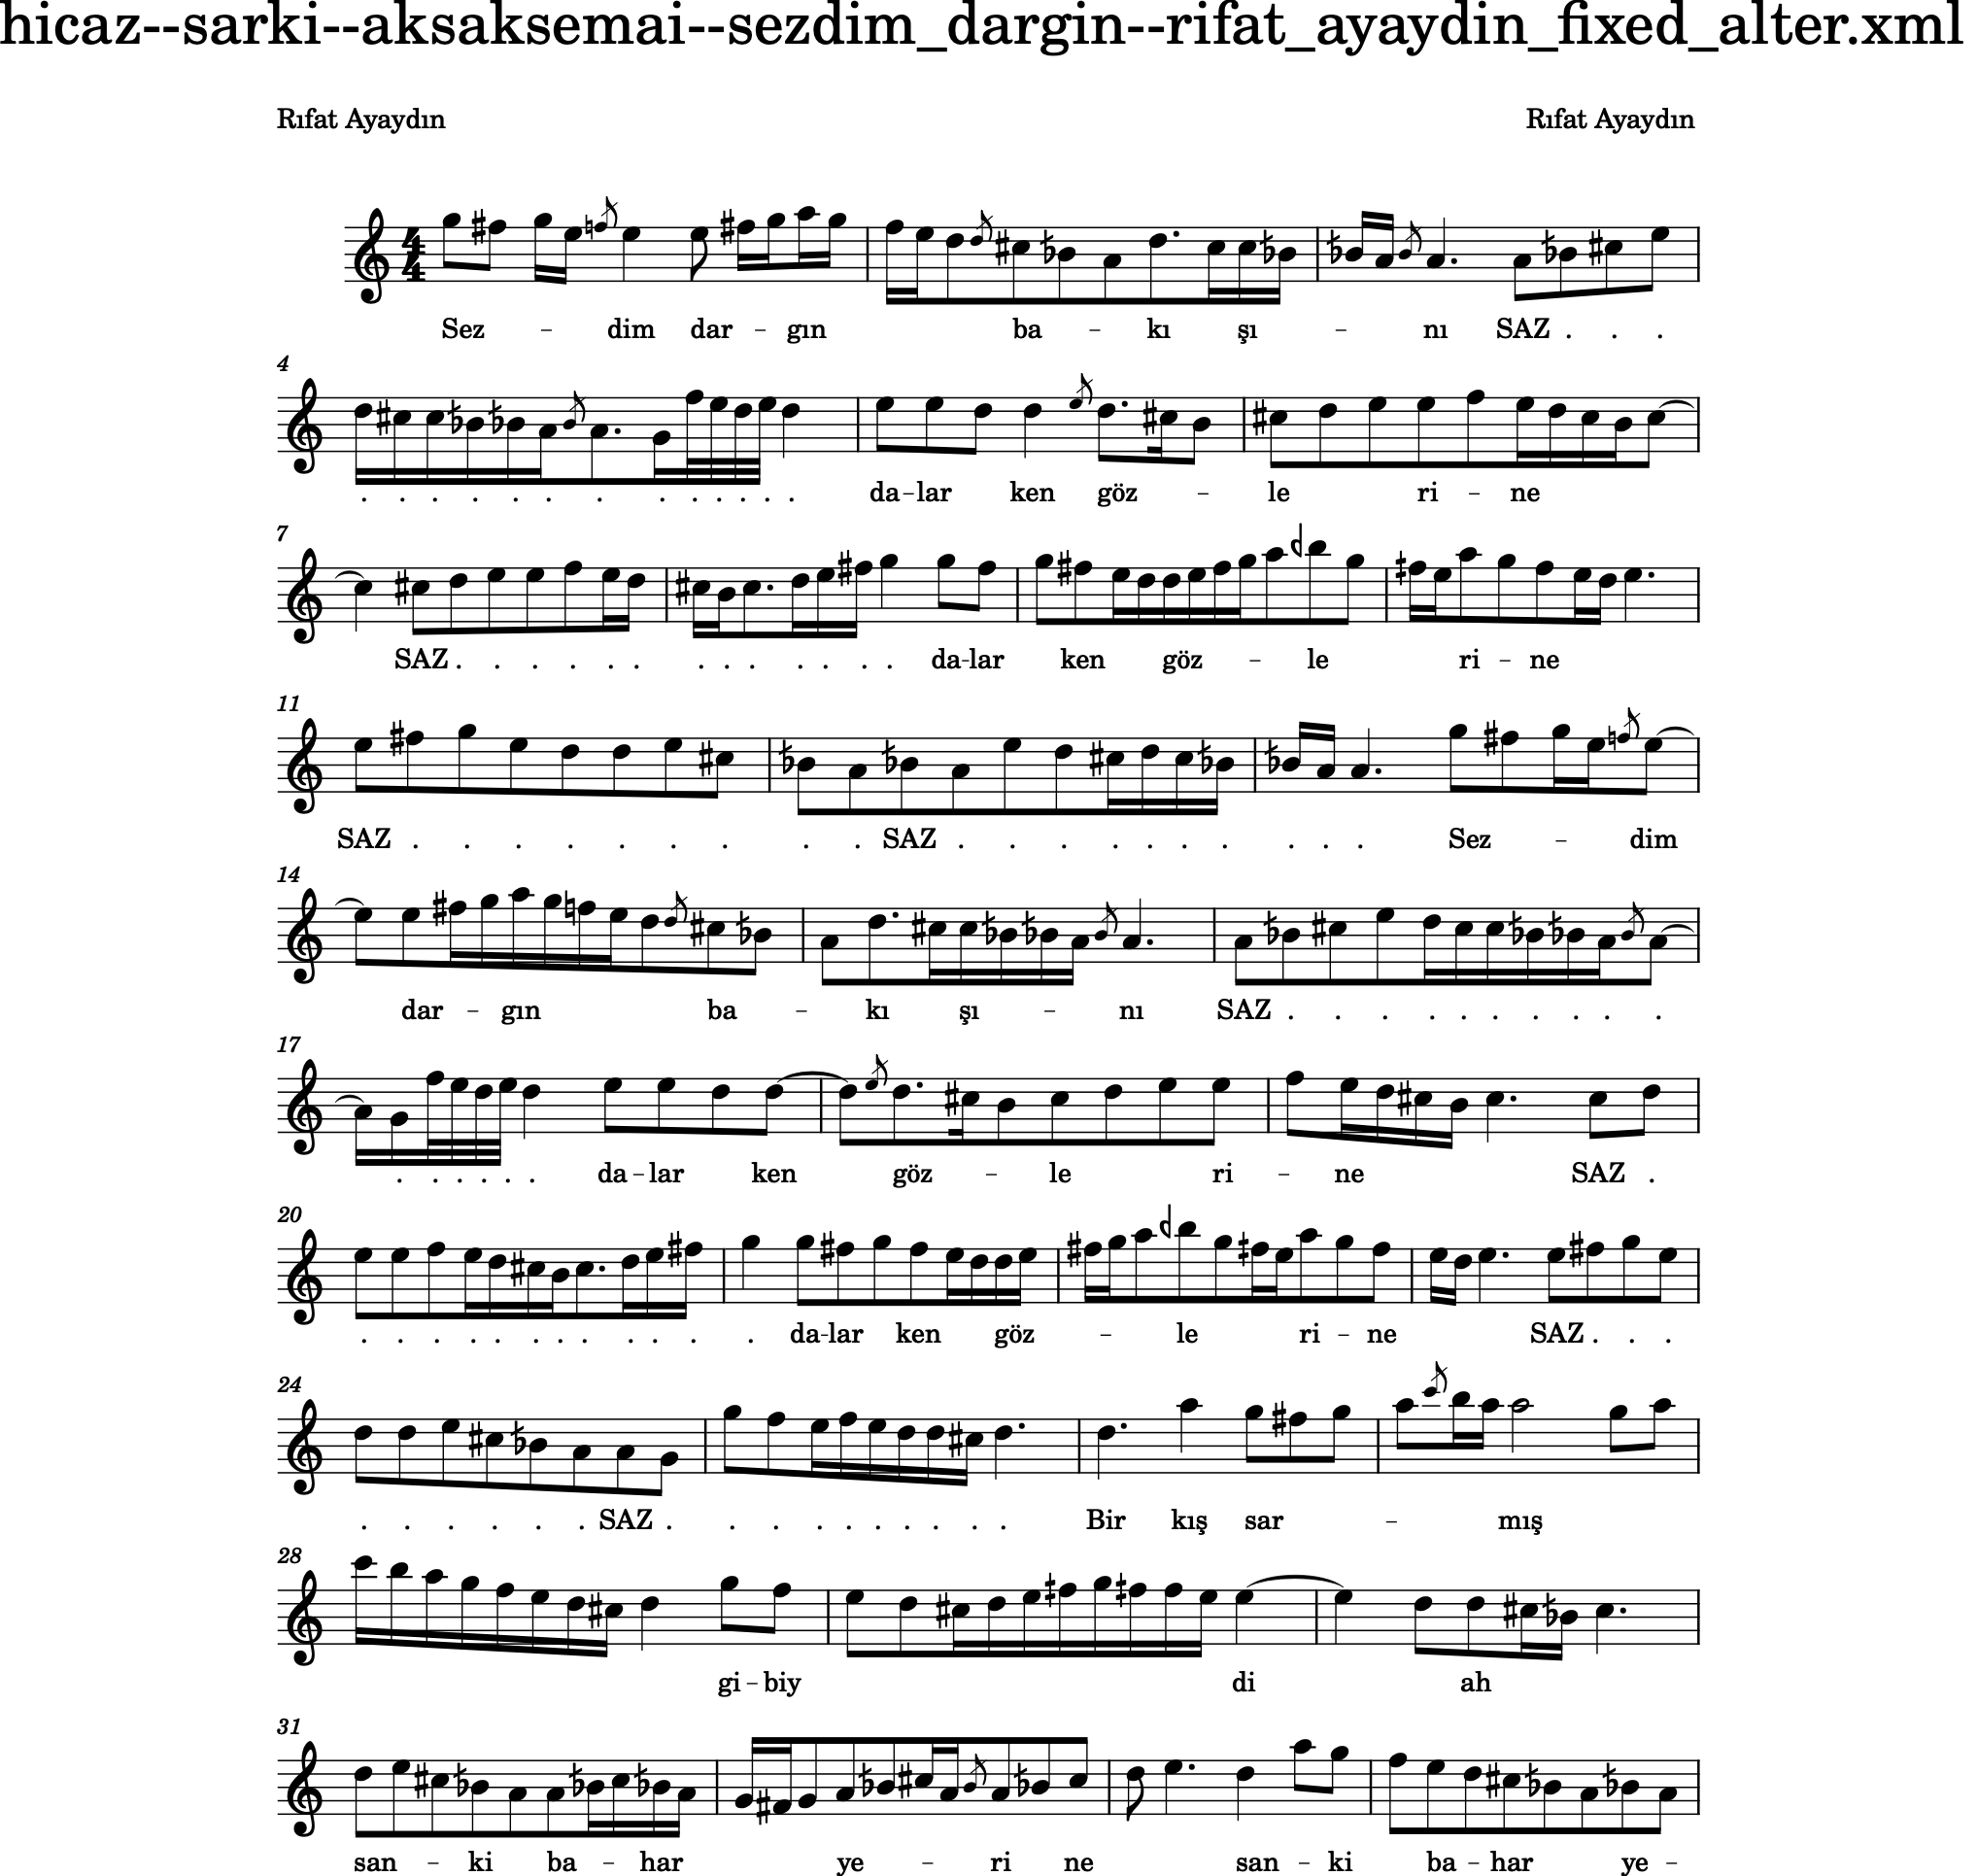

In [3]:
m21_stream_score.show()

<music21.graph.plot.HistogramPitchSpace for <music21.stream.Score 0x10523d730>>

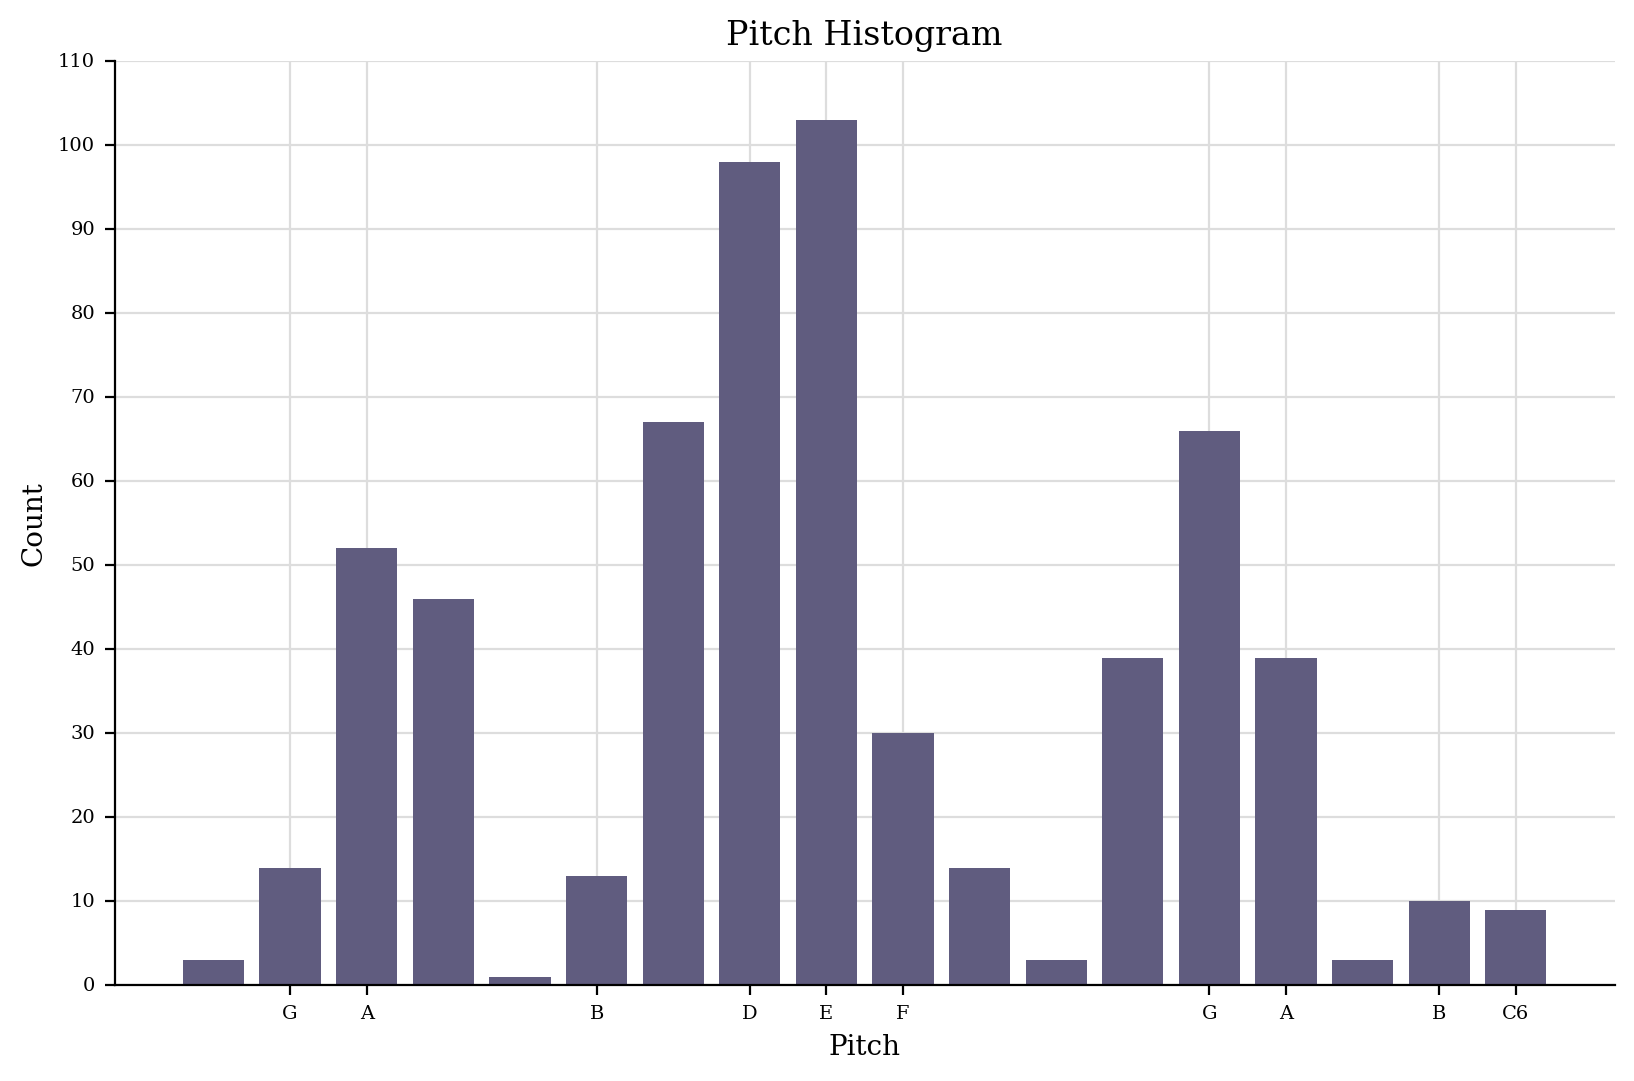

In [4]:
m21_stream_score.plot('histogram', 'pitchspace')

### Find all the accidentals and their corresponding microtones present in Aksaksemai Usul

In [5]:
datasetPath = '../SymbTr/MusicXML/'# Path to the folder that contains the MusicXML scores

allScores = os.listdir(datasetPath)

aksaksemaiScores = []

for score in allScores:
    try:
        if score.split('--')[2] == 'aksaksemai':
            aksaksemaiScores.append(score)
    except:
        continue
        
print('Found {} scores with aksaksemai usul'.format(len(aksaksemaiScores)))

Found 128 scores with aksaksemai usul


In [6]:
accidentals = []
microtones = []


# Create a folder to contain the xml scores without key signature
newFolder = os.path.join(datasetPath, 'aksaksemaiScores')
# os.mkdir(newFolder, exist_ok=True)

for makamScore in aksaksemaiScores:
    print(aksaksemaiScores.index(makamScore)+1, '- Processing', makamScore)
    
    # Remove the key signature from the xml file
    tree = ET.parse(os.path.join(datasetPath, makamScore))
    root = tree.getroot()
    
    for att in root.iter('attributes'):
        if att.find('key'):
            att.remove(att.find('key'))
    
    # Save the new xml files to be later loaded with music21
    newMakamScore = os.path.join(newFolder, makamScore[:-4] + '_noKeySignature.xml')
    tree.write(newMakamScore)
    
    # Load the file in music21 and get a stream with all the notes
    s = fix_m21_parsing_makam(newMakamScore, remove_alter=True)
    nn = s.flatten().notes.stream()
    
    # Count the notes per beat
    for n in nn:
        if n.isRest:
            continue
        if n.pitch.accidental is not None:
            accidentals.append(n.pitch.accidental.name)
            microtones.append(n.pitch.microtone.cents)

print('\nDone!')

1 - Processing beyati--sarki--aksaksemai--aglatma_beni--dede_efendi.xml
The key signature of this score has:
Accidentals found and updated: {'sharp', 'flat', 'slash-flat'}
2 - Processing isfahan--sazsemaisi--aksaksemai----tanburi_cemil_bey.xml
The key signature of this score has:
Accidentals found and updated: {'sharp', 'flat'}
3 - Processing beyati_araban--sazsemaisi--aksaksemai----rauf_yekta.xml
The key signature of this score has:
Accidentals found and updated: {'sharp', 'flat', 'slash-flat'}
4 - Processing sevkefza--kupe--aksaksemai--sevkefza--ahmet_avni_konuk.xml
The key signature of this score has:
Accidentals found and updated: {'flat', 'slash-flat'}
5 - Processing karcigar--sazsemaisi--aksaksemai----kanuni_omer_efendi.xml
The key signature of this score has:
Accidentals found and updated: {'sharp', 'flat', 'slash-flat'}
6 - Processing huzzam--sazsemaisi--aksaksemai----gazi_giray_han.xml
The key signature of this score has:
Accidentals found and updated: {'sharp', 'slash-flat'}


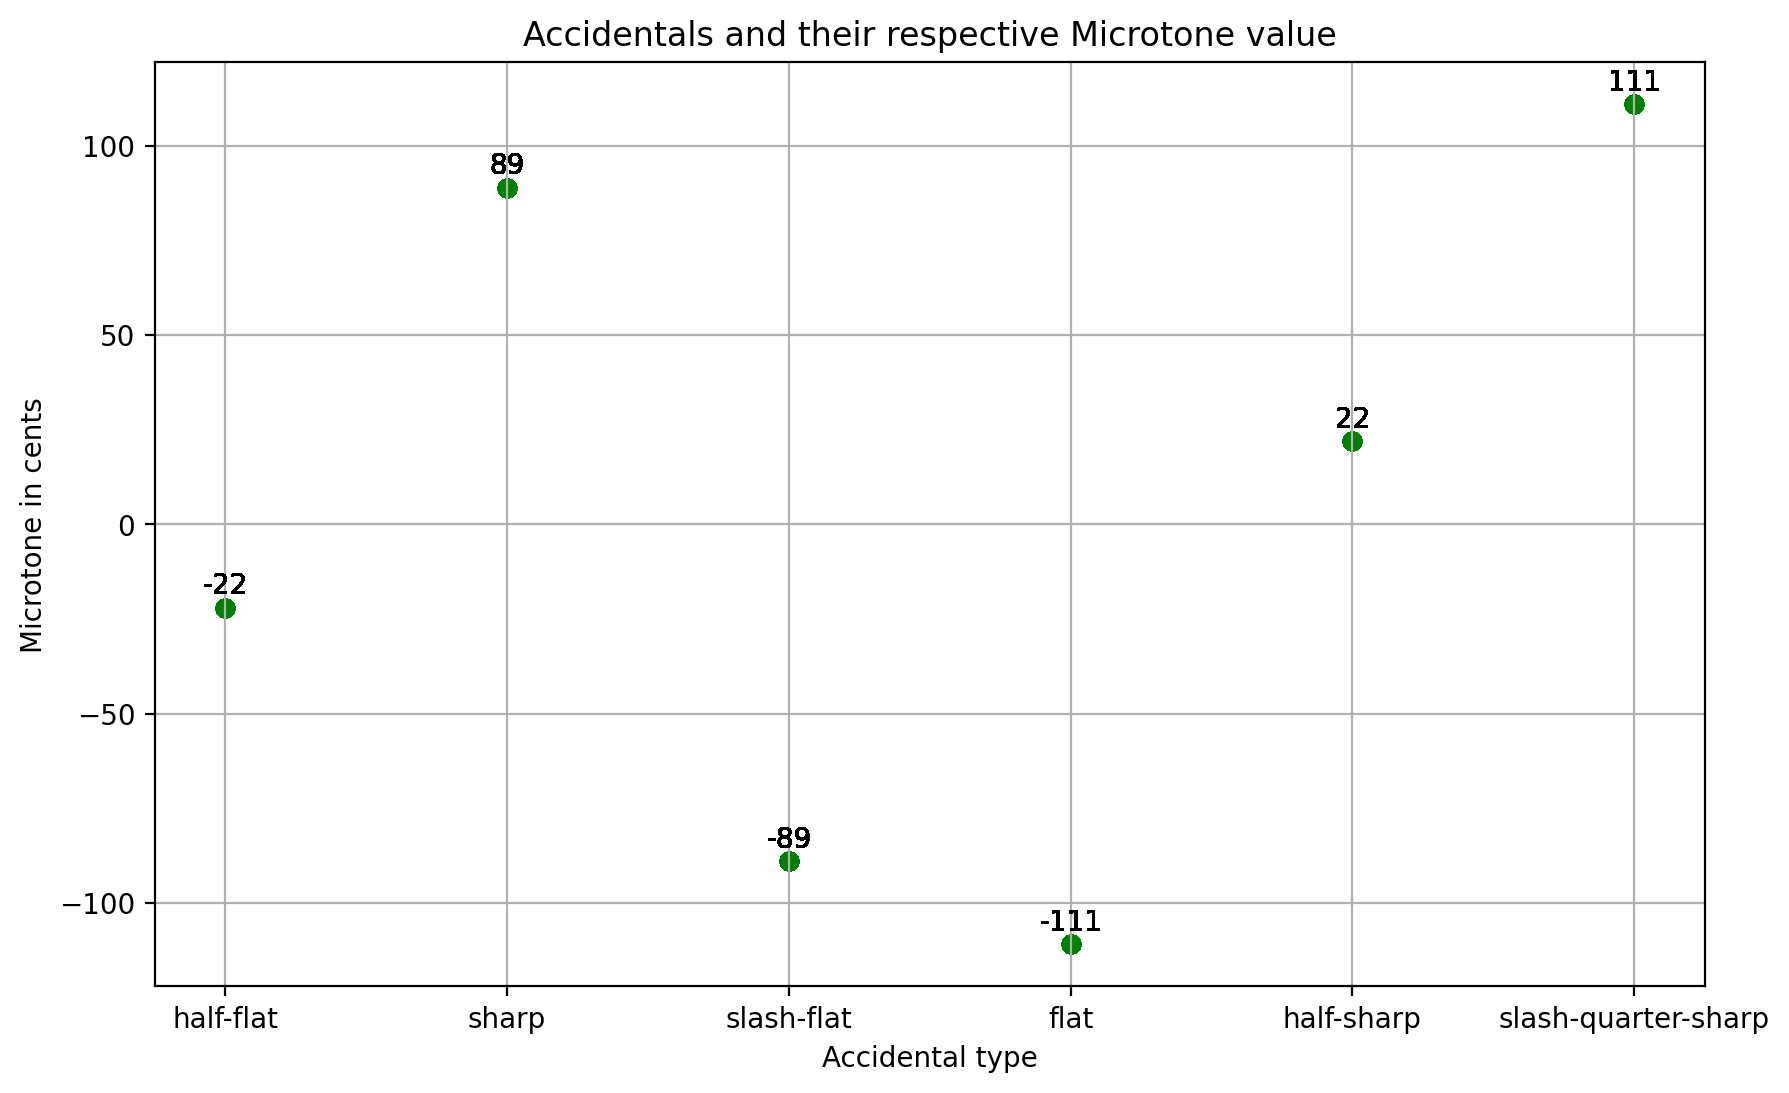

In [7]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(accidentals, microtones, marker='o', linestyle='-', color='green')

# Annotate each point with its microtone value
for x, y in zip(accidentals, microtones):
    plt.text(x, y+2, str(y), ha='center', va='bottom')

plt.title('Accidentals and their respective Microtone value')
plt.xlabel('Accidental type')
plt.ylabel('Microtone in cents')
plt.grid(True)
plt.show()